In [38]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from sklearn.metrics import roc_auc_score

# load train and test dataset
def load_dataset():
            # load dataset
            (x_train, y_train), (x_test, y_test) = cifar10.load_data()
            # one hot encode target values
            y_train = to_categorical(y_train)
            y_test = to_categorical(y_test)
            return x_train, y_train, x_test, y_test

# scale pixels
def prep_images(train, test):
            # convert from integers to floats
            train_norm = train.astype('float32')
            test_norm = test.astype('float32')
            # normalize to range 0-1
            train_norm = train_norm / 255.0
            test_norm = test_norm / 255.0
            # return normalized images
            return train_norm, test_norm

# define cnn model
def define_model():
            model = Sequential()
            model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
            model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
            model.add(MaxPooling2D((2, 2)))
            model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
            model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
            model.add(MaxPooling2D((2, 2)))
            model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
            model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
            model.add(MaxPooling2D((2, 2)))
            model.add(Flatten())
            model.add(Dense(128, activation='relu'))
            model.add(Dense(10, activation='softmax'))
	
	return model

# run the test harness for evaluating a model
def final():
			x_train, y_train,x_test, y_test = load_dataset()
			# prepare pixel data
			x_train, x_test= prep_images(x_train, x_test)
			# define model
			model = define_model()
			# fit model
			opt = SGD(lr=0.001)
			model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
			history=model.fit(x_train, y_train, epochs=50, batch_size=64, verbose=1)
            # save model
			model.save('final_model.h5')
			y_predict = model.predict(x_test)
			auc_score1 = roc_auc_score(y_test, y_predict)
			print('Model roc_auc_score:', auc_score1)
			return history

		
final()

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
782/782 [==============================] - 7s 8ms/step - loss: 2.0257 - accuracy: 0.2786
Epoch 2/50
782/782 [==============================] - 6s 8ms/step - loss: 1.7698 - accuracy: 0.3746
Epoch 3/50
782/782 [==============================] - 6s 8ms/step - loss: 1.6447 - accuracy: 0.4160
Epoch 4/50
782/782 [==============================] - 6s 7ms/step - loss: 1.5628 - accuracy: 0.4457
Epoch 5/50
782/782 [==============================] - 6s 8ms/step - loss: 1.5008 - accuracy: 0.4672
Epoch 6/50
782/782 [==============================] - 5s 7ms/step - loss: 1.4493 - accuracy: 0.4855
Epoch 7/50
782/782 [==============================] - 6s 8ms/step - loss: 1.4103 - accuracy: 0.5012
Epoch 8/50
782/782 [==============================] - 5s 7ms/step - loss: 1.3685 - accuracy: 0.5157
Epoch 9/50
782/782 [==============================] - 6s 8ms/step - loss: 1.3345 - accuracy: 0.5293
Epoch 10/50
782/782 [==============================] - 6s 7ms/step - loss: 1.3061 - accuracy: 0.5399

#### Test below image with model

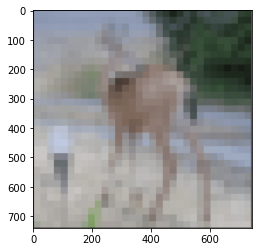

In [42]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 
image = mpimg.imread("1.png")
plt.imshow(image)
plt.show()

In [39]:
# make a prediction for image.
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
            # load the image
            img = load_img(filename, target_size=(32, 32))
            # convert to array
            img = img_to_array(img)
            # reshape into a single sample with 3 channels
            img = img.reshape(1, 32, 32, 3)
            # prepare pixel data
            img = img.astype('float32')
            img = img / 255.0
            return img

# load an image and predict the class
def run_example():
            # load the image
            img = load_image('1.png')
            # load model
            model = load_model('final_model.h5')
            # predict the class
            result = model.predict(img)
            result = result.argmax(axis=1)
            print('The class of image:',result[0])

# entry point, run the example
run_example()

1/1 [==============================] - 0s 92ms/step
The class of image: 4
